In [1]:
from Utils.data_generators import *
from Utils.util_plotting import *
from Utils.util_data_preprocessing import *
package = 'prim'

/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:59: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_d

experiment 720/240

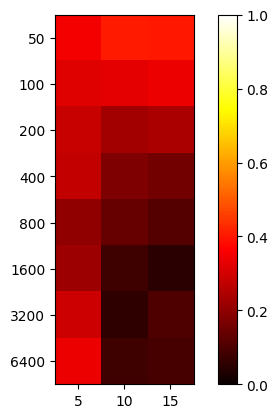

[[0.53624981 0.58093031 0.58520091]
 [0.61309794 0.6659894  0.66153392]
 [0.69926272 0.76823615 0.75927659]
 [0.68776447 0.82511365 0.8403556 ]
 [0.77002337 0.86074327 0.88984236]
 [0.7640722  0.92163871 0.94964085]
 [0.6977886  0.94167795 0.89595818]
 [0.65722222 0.91944444 0.90722222]]
[[0.88580808 0.98424242 0.98449495]
 [0.93090909 0.99030303 1.        ]
 [0.98060606 0.99666667 1.        ]
 [0.96454545 1.         1.        ]
 [0.97       1.         1.        ]
 [0.98363636 1.         1.        ]
 [0.99       1.         1.        ]
 [0.99666667 1.         1.        ]]


In [2]:
#whitout preprocessing
create_plot_generated_data(calculate_y_oakley_ohagan2004, 15, package, None)

experiment 720/720

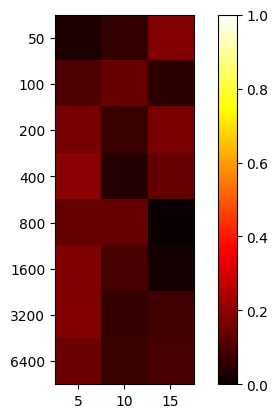

[[0.60325976 0.53694885 0.61265235]
 [0.74200917 0.70015444 0.52580864]
 [0.78372916 0.58839183 0.7622668 ]
 [0.79278686 0.72523542 0.86295613]
 [0.84858631 0.82341611 0.8278209 ]
 [0.82720233 0.90898378 0.66895397]
 [0.82270344 0.93404764 0.81831315]
 [0.85479805 0.92910899 0.88100949]]
[[0.63644911 0.59651515 0.79299145]
 [0.84677545 0.84355272 0.58419192]
 [0.94535354 0.66121212 0.92971639]
 [0.98474747 0.76675214 1.        ]
 [0.98501166 0.96111888 0.83060606]
 [1.         1.         0.6829798 ]
 [1.         1.         0.89666667]
 [1.         1.         0.97090909]]


In [2]:
#with preprocessing (zscore outlier removal)
create_plot_generated_data(calculate_y_oakley_ohagan2004, 15, package, [outlier_detection_z_score])

experiment 720/240

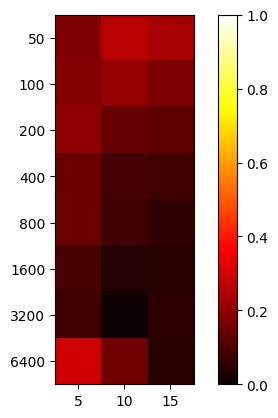

[[0.69955639 0.72394056 0.74006801]
 [0.76527927 0.79115385 0.83195479]
 [0.7708357  0.86060536 0.87227148]
 [0.83151551 0.91129454 0.91784902]
 [0.83520825 0.91455884 0.94212842]
 [0.88950072 0.95882384 0.955474  ]
 [0.90509259 0.99388889 0.94888889]
 [0.69166667 0.8452381  0.95333333]]
[[0.87238151 0.9820202  0.97330614]
 [0.9519697  0.99666667 1.        ]
 [0.96787879 1.         1.        ]
 [0.97393939 1.         1.        ]
 [0.98       1.         1.        ]
 [0.98030303 1.         1.        ]
 [0.98428571 1.         1.        ]
 [0.9869697  1.         1.        ]]


In [4]:
#with preprocessing (discretize with kbins)
create_plot_generated_data(calculate_y_oakley_ohagan2004, 15, package, [discretize_with_kbins])

experiment 720/240

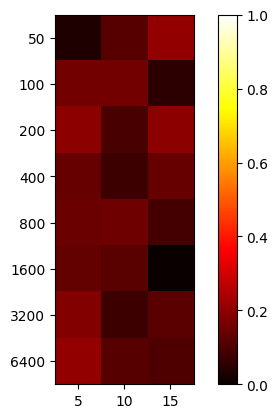

[[0.54032866 0.539898   0.59402495]
 [0.69656588 0.72160012 0.52897061]
 [0.75894429 0.67824511 0.74985803]
 [0.82503815 0.71821444 0.85425756]
 [0.84876646 0.81793221 0.81615342]
 [0.86128138 0.88040776 0.66682126]
 [0.81420633 0.91678184 0.79430045]
 [0.7965623  0.88391783 0.88192578]]
[[0.57212121 0.65617327 0.7991675 ]
 [0.85651515 0.87905206 0.58116162]
 [0.95561772 0.77273504 0.94540404]
 [0.96388889 0.79606061 0.99444444]
 [0.99333333 0.96863636 0.90333333]
 [0.99666667 1.         0.65522145]
 [0.99666667 0.99333333 0.91786325]
 [1.         1.         0.98547786]]


In [5]:
create_plot_generated_data(calculate_y_oakley_ohagan2004, 15, package, [discretize_with_kbins, outlier_detection_z_score])

experiment 720/240

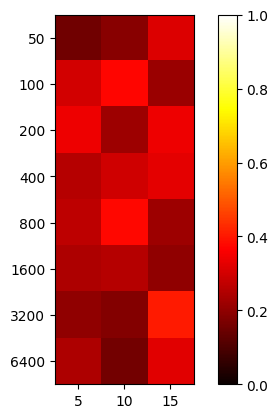

[[0.28031765 0.33696424 0.44295083]
 [0.5584831  0.52543133 0.37231943]
 [0.62019399 0.37104126 0.52588376]
 [0.7033763  0.50340042 0.67294055]
 [0.70782878 0.59692408 0.64571123]
 [0.74406342 0.73672611 0.36400035]
 [0.78169966 0.81966285 0.57757391]
 [0.75419557 0.83990378 0.67663055]]
[[0.43545455 0.52823232 0.75707071]
 [0.85914141 0.89779887 0.58952603]
 [0.96060606 0.59       0.86722222]
 [0.95777778 0.79826729 0.99761905]
 [0.97444444 0.97540404 0.86666667]
 [0.9869697  0.99333333 0.5659596 ]
 [0.98141414 1.         0.98030303]
 [1.         1.         0.9974359 ]]


In [6]:
create_plot_generated_data(calculate_y_oakley_ohagan2004, 15, package, [outlier_detection_z_score, discretize_with_kbins])

experiment 720/240

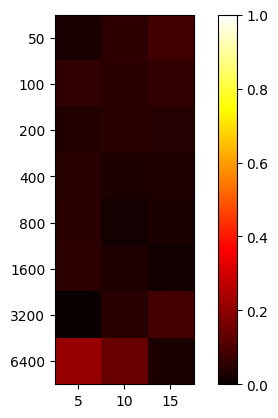

[[0.91920319 0.93692872 0.91524269]
 [0.93486152 0.94879998 0.94046406]
 [0.95406365 0.95561627 0.9601983 ]
 [0.95371879 0.96931578 0.96827697]
 [0.94913442 0.98190318 0.97437216]
 [0.94095588 0.96664983 0.98521164]
 [0.99666667 0.95444444 0.91388889]
 [0.78333333 0.85833333 0.97638889]]
[[0.94570707 0.99030303 1.        ]
 [0.99666667 0.99666667 1.        ]
 [0.99030303 1.         1.        ]
 [1.         1.         1.        ]
 [0.99666667 1.         1.        ]
 [0.99333333 1.         1.        ]
 [0.99666667 1.         1.        ]
 [0.99761905 1.         1.        ]]


In [7]:
create_plot_generated_data(calculate_y_ackley, 15, package, None)

experiment 720/720

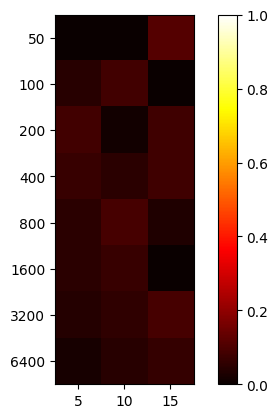

[[0.6781113  0.55048181 0.78050086]
 [0.88140308 0.89534131 0.69352981]
 [0.90791862 0.70746668 0.89154985]
 [0.92654299 0.87052118 0.85387309]
 [0.94847049 0.90739393 0.65155289]
 [0.95198385 0.92978257 0.76594579]
 [0.95835674 0.94334463 0.90390776]
 [0.9769601  0.95602811 0.93383909]]
[[0.67964646 0.55081585 0.89137529]
 [0.92562354 0.97848485 0.66015152]
 [0.99055556 0.72090909 0.97055556]
 [0.99666667 0.92029582 0.93333333]
 [0.99666667 1.         0.68333333]
 [1.         1.         0.76055944]
 [1.         1.         0.99388889]
 [1.         1.         1.        ]]


In [3]:
#with preprocessing (zscore outlier removal)
create_plot_generated_data(calculate_y_ackley, 15, package, [outlier_detection_z_score])

experiment 720/240

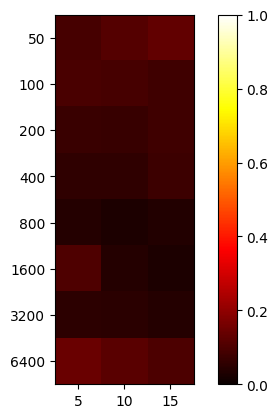

[[0.87549269 0.88237093 0.86884059]
 [0.89091791 0.90782221 0.91876234]
 [0.91798152 0.92972722 0.91930951]
 [0.93759775 0.94480853 0.92387273]
 [0.95392779 0.96931328 0.9633152 ]
 [0.89552295 0.95867059 0.96926848]
 [0.9449359  0.95238095 0.95873016]
 [0.85555556 0.88055556 0.90166667]]
[[0.96651515 0.99388889 1.        ]
 [0.98722222 1.         0.99722222]
 [0.99       1.         1.        ]
 [0.99333333 1.         1.        ]
 [0.99666667 1.         1.        ]
 [1.         1.         1.        ]
 [0.99722222 1.         1.        ]
 [1.         1.         1.        ]]


In [9]:
create_plot_generated_data(calculate_y_ackley, 15, package, [discretize_with_kbins])

experiment 720/240

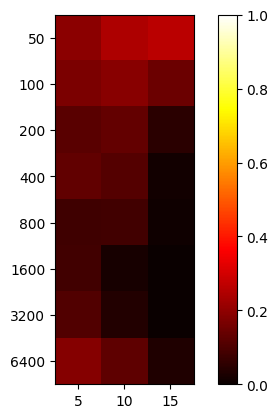

[[0.66696719 0.72248281 0.70679233]
 [0.69828759 0.7969723  0.85509533]
 [0.82388091 0.8552196  0.94939293]
 [0.82426121 0.88508119 0.98452081]
 [0.88099961 0.91277696 0.99104874]
 [0.87819764 0.97777778 1.        ]
 [0.87574074 0.96296296 1.        ]
 [0.80111111 0.875      0.96666667]]
[[0.85946387 0.96773893 0.97044733]
 [0.86988345 0.98727273 1.        ]
 [0.94308081 0.99076923 1.        ]
 [0.95470862 0.99666667 1.        ]
 [0.96010101 0.9974359  1.        ]
 [0.96137529 1.         1.        ]
 [0.98388889 1.         1.        ]
 [0.9869697  1.         1.        ]]


In [10]:
create_plot_generated_data(calculate_y_griewank, 15, package, None)

experiment 720/720

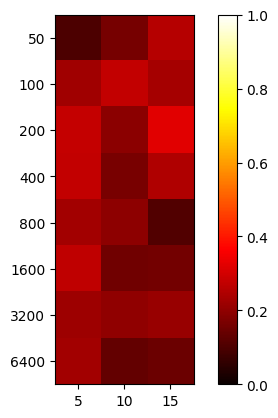

[[0.52802411 0.50220753 0.42652849]
 [0.59193244 0.61664321 0.469981  ]
 [0.61312623 0.60370528 0.62351941]
 [0.66141295 0.52931637 0.74687355]
 [0.72772587 0.69239586 0.77781971]
 [0.70533669 0.83583872 0.58157483]
 [0.76454323 0.78581174 0.72706351]
 [0.77091595 0.85955403 0.84944264]]
[[0.62770008 0.66426129 0.68311688]
 [0.8169697  0.89348485 0.7029798 ]
 [0.89262626 0.79843434 0.94661616]
 [0.93538462 0.69585859 0.99487179]
 [0.95671717 0.89151515 0.88540404]
 [0.9762963  0.99       0.73958042]
 [0.98666667 0.98674603 0.94065657]
 [1.         0.99333333 0.9969697 ]]


In [4]:
#with preprocessing (zscore outlier removal)
create_plot_generated_data(calculate_y_griewank, 15, package, [outlier_detection_z_score])

experiment 720/240

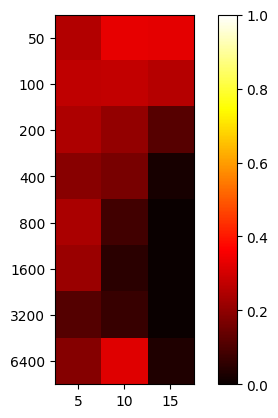

[[0.58298603 0.6175656  0.65538373]
 [0.621742   0.70686134 0.74327431]
 [0.70462456 0.78948779 0.88099845]
 [0.77783314 0.82770512 0.98039709]
 [0.72449216 0.91282053 0.99747546]
 [0.75027658 0.9463291  1.        ]
 [0.87019841 0.93115079 1.        ]
 [0.8        0.67666667 0.96666667]]
[[0.83450216 0.94929293 0.98132479]
 [0.89387335 0.98193085 0.99722222]
 [0.94927739 0.99333333 0.99666667]
 [0.96650794 0.99333333 1.        ]
 [0.96392496 0.99666667 1.        ]
 [0.96666667 0.99666667 1.        ]
 [0.98090909 1.         1.        ]
 [0.98410256 0.99666667 1.        ]]


In [12]:
#with preprocessing (zscore outlier removal)
create_plot_generated_data(calculate_y_griewank, 15, package, [discretize_with_kbins])

In [13]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 18]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1
data = get_data('susy')

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)*len(atrs)))
            
            num_columns_to_select = atrs[m]  # Change this to the number of columns you need
            label_column = None
            
            data_temp = data.copy()
            label_column = data_temp['label']
            data_temp.drop('label', axis=1, inplace=True)

                # Select random columns
            selected_columns = random.sample(list(data_temp.columns), num_columns_to_select)

                # Create a new DataFrame with the selected columns
            data_temp = data_temp[selected_columns]
            data_temp.insert(loc=0, column='label', value=label_column)
            
                #sampeling a subset of the whole data set
            sample_train, sample_test = train_test_split(data_temp, test_size=pts[n], train_size=pts[n]*2, stratify=data_temp['label'])
        
            sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
            sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

            y = sample_train['label'].values
            sample_train.drop('label', axis=1, inplace=True)
            x = sample_train.values
            
            y_test = sample_test['label']
            sample_test.drop('label', axis=1, inplace=True)
            x_test = sample_test.values
            
            prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
            prim_alg.fit()
            precisions = prim_alg.get_precisions()
            if len(precisions) <= 0:
                prec_train.append(0)
            else:
                prec_train.append(precisions[len(precisions)-1])
            boxes = prim_alg.get_boxes()
            if len(boxes) <= 0:
                prec_test.append(0)
            else:
                box = boxes[len(boxes) - 1]
                box = pd.DataFrame(box)
                prec_test.append(calculate_precision_test_data_onebox(box, x_test, y_test))           
        
        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test) 
        k = k + 1

plt.imshow(res_train-res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.colorbar()
plt.show()

experiment 1/32

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 18]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1
data = get_data('higgs')

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts) * len(atrs)))

            num_columns_to_select = atrs[m]  # Change this to the number of columns you need
            label_column = None

            data_temp = data.copy()
            label_column = data_temp['label']
            data_temp.drop('label', axis=1, inplace=True)

            # Select random columns
            selected_columns = random.sample(list(data_temp.columns), num_columns_to_select)

            # Create a new DataFrame with the selected columns
            data_temp = data_temp[selected_columns]
            data_temp.insert(loc=0, column='label', value=label_column)

            #sampeling a subset of the whole data set
            sample_train, sample_test = train_test_split(data_temp, test_size=pts[n], train_size=pts[n] * 2, stratify=data_temp['label'])

            sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
            sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

            y = sample_train['label'].values
            sample_train.drop('label', axis=1, inplace=True)
            x = sample_train.values

            y_test = sample_test['label']
            sample_test.drop('label', axis=1, inplace=True)
            x_test = sample_test.values

            prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
            prim_alg.fit()
            precisions = prim_alg.get_precisions()
            if len(precisions) <= 0:
                prec_train.append(0)
            else:
                prec_train.append(precisions[len(precisions) - 1])
            boxes = prim_alg.get_boxes()
            if len(boxes) <= 0:
                prec_test.append(0)
            else:
                box = boxes[len(boxes) - 1]
                box = pd.DataFrame(box)
                prec_test.append(calculate_precision_test_data_onebox(box, x_test, y_test))

        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test)
        k = k + 1

plt.imshow(res_train - res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.colorbar()
plt.show()